In [411]:
from numpy.random import normal
import matplotlib.pyplot as plt

In [412]:
from numpy import hstack
import numpy as np

# Data set Samples are generated by Normal Distribution


In [414]:
#loc - mean  scale-std deviation
dataset1= normal(loc=10, scale=3, size = 2000)
dataset2= normal(loc=20, scale=3, size = 4000)

In [415]:
# Combines Dataset Samples from different Distributions

In [416]:
dataset = hstack((dataset1, dataset2))

(array([0.00056239, 0.00213707, 0.00663616, 0.01698407, 0.03059382,
        0.04105421, 0.0416166 , 0.03700503, 0.0321685 , 0.03104373,
        0.04015439, 0.06321223, 0.08638255, 0.08210842, 0.07749685,
        0.04780285, 0.02339528, 0.01057286, 0.00281193, 0.00112477]),
 array([ 0.4124711 ,  1.89425178,  3.37603247,  4.85781315,  6.33959383,
         7.82137451,  9.3031552 , 10.78493588, 12.26671656, 13.74849724,
        15.23027793, 16.71205861, 18.19383929, 19.67561998, 21.15740066,
        22.63918134, 24.12096202, 25.60274271, 27.08452339, 28.56630407,
        30.04808475]),
 <BarContainer object of 20 artists>)

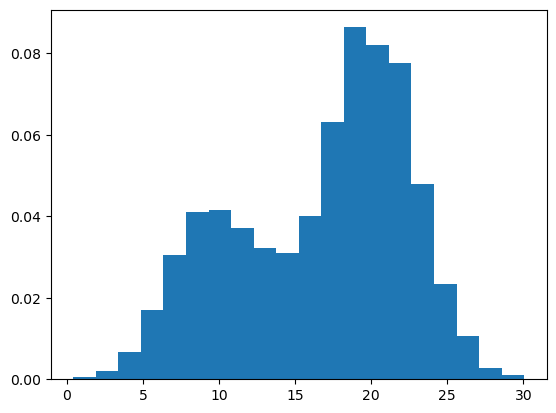

In [417]:
plt.hist(dataset, bins=20, density=True)

In [418]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

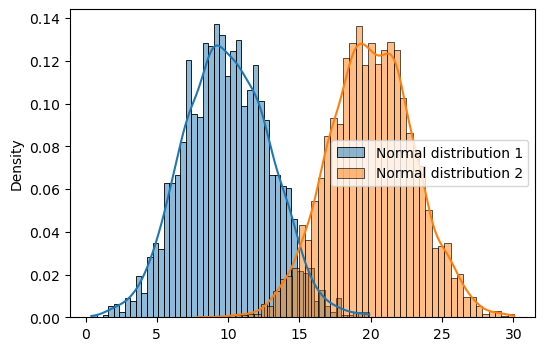

In [419]:
fig = plt.figure(figsize=(6, 4), dpi=100)
# using histplot (axes-level function)
sns.histplot(dataset1, bins=50, kde=True, stat="density", label='Normal distribution 1')
sns.histplot(dataset2, bins=50, kde=True, stat="density", label='Normal distribution 2')
plt.legend()
plt.show()

In [420]:
from sklearn.mixture import GaussianMixture

In [421]:
dataset = dataset.reshape((len(dataset),1))

In [422]:
import pandas as pd

In [423]:
data = pd.DataFrame(dataset)

In [424]:
data.head()

,0
0,4.597507
1,12.749853
2,8.000938
3,19.219862
4,3.147767


In [425]:
data.rename({0:'group'},axis='columns')

,group
0,4.597507
1,12.749853
2,8.000938
3,19.219862
4,3.147767
...,...
5995,21.818966
5996,17.133077
5997,18.757376
5998,16.857698


In [426]:
learner = GaussianMixture(n_components=2,init_params='random')

In [427]:
learner.fit(data)

GaussianMixture(init_params='random', n_components=2)

In [428]:
y = learner.predict(data)

In [429]:
y[:100]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [430]:
y1=pd.DataFrame(y)
y1.iloc[-100]

0    0
Name: 5900, dtype: int64

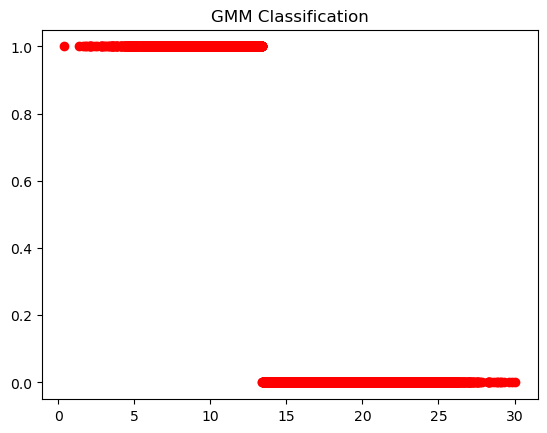

In [431]:
colormap=np.array(['red'])
plt.title('GMM Classification')
plt.scatter(data,y,c=colormap)

In [432]:
y1.rename({0:'cluster'},axis='columns', inplace=True)
y1.head()

,cluster
0,1
1,1
2,1
3,0
4,1


In [433]:
d0 = y1[y1['cluster']== 0]
d1 = y1[y1['cluster']== 1]